In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

import xgboost as xgb
from xgboost import XGBClassifier

# Load Data

In [2]:
data = np.load("../my_comp_train_XY.npz")
X = data["X"]
y = data["y"]

# Split train and test data

In [3]:
X = X.reshape(X.shape[0], -1)
# split train and test data(ratio 0.8:0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [4]:
# X_data 0 to 1 scaled
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

# Classification

## XGBoost base model

In [8]:
# train XGboost base model
xgboost_base = XGBClassifier()
xgboost_base.fit(X_train_scaled, y_train)

[11:16:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
# accuracy score
y_pred_xgb_train = xgboost_base.predict(X_train_scaled)
accuracy_score_xgb_train = accuracy_score(y_pred_xgb_train, y_train)
print(accuracy_score_xgb_train)

1.0


In [11]:
# confusion matrix value
matric_xgb_train = confusion_matrix(y_train, y_pred_xgb_train)
matric_xgb_train

array([[3317,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 2697,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 4289,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 3923,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 3271,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 2602,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 4261,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 4009,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 4681,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 3331]],
      dtype=int64)

## calculation time

In [21]:
# measure time XGboost(n_estimators=10)
xgboost_base = XGBClassifier(n_estimators=10)
%time xgboost_base.fit(X_train_scaled, y_train)

C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:04:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1min 55s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Observation
n estimator=10 about 2 minutes

In [22]:
# measure time XGboost(n_estimators=50)
xgboost_base = XGBClassifier(n_estimators=50)
%time xgboost_base.fit(X_train_scaled, y_train)

[13:07:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 8min 40s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Observation
n estimator=50 about 8.5 minutes

So training time proportional to n estimator

## XGBoost with GridSearchCV

## search best n estimator

In [24]:
# XGboost with grid search
param_grid = [
    {"n_estimators": [10, 50, 100]}
]

In [28]:
# GridSearch
xgboost_gs = GridSearchCV(XGBClassifier(), param_grid, verbose=2, cv=3)
%time xgboost_gs.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:22:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....................................n_estimators=10; total time= 1.2min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:24:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....................................n_estimators=10; total time=  52.3s


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:25:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....................................n_estimators=10; total time=  47.6s


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:25:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....................................n_estimators=50; total time= 3.8min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....................................n_estimators=50; total time= 3.9min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....................................n_estimators=50; total time= 3.4min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...................................n_estimators=100; total time= 7.1min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:44:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...................................n_estimators=100; total time= 6.9min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:50:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...................................n_estimators=100; total time= 6.8min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:57:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 44min 8s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [29]:
xgboost_gs.cv_results_

{'mean_fit_time': array([ 57.09191044, 222.11154111, 415.61201437]),
 'std_fit_time': array([10.47919853, 12.344355  ,  7.4561485 ]),
 'mean_score_time': array([0.23115571, 0.34922282, 0.36489058]),
 'std_score_time': array([0.00419354, 0.03017118, 0.00473492]),
 'param_n_estimators': masked_array(data=[10, 50, 100],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}],
 'split0_test_score': array([0.930898  , 0.9631401 , 0.96767543]),
 'split1_test_score': array([0.92957863, 0.96437701, 0.96874742]),
 'split2_test_score': array([0.93972128, 0.96808774, 0.97212831]),
 'mean_test_score': array([0.9333993 , 0.96520162, 0.96951706]),
 'std_test_score': array([0.00450265, 0.00210234, 0.00189759]),
 'rank_test_score': array([3, 2, 1])}

In [30]:
# params vs accuracy
params = xgboost_gs.cv_results_['params']
accuracy_list = xgboost_gs.cv_results_['mean_test_score']

result_list = []
for param, accuracy in zip(params, accuracy_list):
    param["acc"] = accuracy
    result_list.append(param)

In [31]:
result_list

[{'n_estimators': 10, 'acc': 0.9333993018333745},
 {'n_estimators': 50, 'acc': 0.9652016162282511},
 {'n_estimators': 100, 'acc': 0.9695170556059481}]

In [32]:
df_result_list = pd.DataFrame(result_list)
df_result_list

,n_estimators,acc
0,10,0.933399
1,50,0.965202
2,100,0.969517


<AxesSubplot:xlabel='n_estimators', ylabel='acc'>

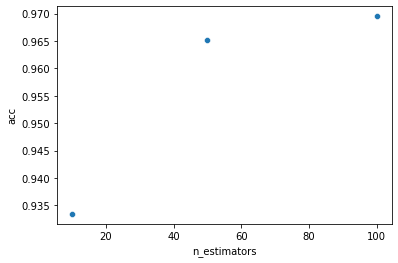

In [33]:
# plot params vs accuracy
sns.scatterplot(data=df_result_list, x="n_estimators", y="acc")

### Observation
n estimator > 100 maybe more better

In [34]:
# XGboost with grid search(n > 100)
param_grid = [
    {"n_estimators": [150, 200]}
]

In [35]:
# GridSearch
xgboost_gs = GridSearchCV(XGBClassifier(), param_grid, verbose=2, cv=3)
%time xgboost_gs.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...................................n_estimators=150; total time= 9.3min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:18:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...................................n_estimators=150; total time=10.2min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:28:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...................................n_estimators=150; total time=13.7min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...................................n_estimators=200; total time=16.1min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:58:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...................................n_estimators=200; total time=12.2min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:10:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...................................n_estimators=200; total time=13.4min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:23:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1h 40min 45s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [36]:
xgboost_gs.cv_results_

{'mean_fit_time': array([663.8957773 , 833.09525283]),
 'std_fit_time': array([112.6936895 ,  97.27148165]),
 'mean_score_time': array([0.51651518, 0.77412566]),
 'std_score_time': array([0.08200662, 0.11303038]),
 'param_n_estimators': masked_array(data=[150, 200],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 150}, {'n_estimators': 200}],
 'split0_test_score': array([0.9689948 , 0.96907727]),
 'split1_test_score': array([0.96924219, 0.96932465]),
 'split2_test_score': array([0.97237569, 0.97287045]),
 'mean_test_score': array([0.97020423, 0.97042412]),
 'std_test_score': array([0.00153877, 0.00173276]),
 'rank_test_score': array([2, 1])}

In [37]:
# params vs accuracy
params = xgboost_gs.cv_results_['params']
accuracy_list = xgboost_gs.cv_results_['mean_test_score']

result_list = []
for param, accuracy in zip(params, accuracy_list):
    param["acc"] = accuracy
    result_list.append(param)

In [38]:
result_list

[{'n_estimators': 150, 'acc': 0.9702042274813776},
 {'n_estimators': 200, 'acc': 0.9704241224815151}]

In [39]:
df_result_list = pd.DataFrame(result_list)
df_result_list

,n_estimators,acc
0,150,0.970204
1,200,0.970424


<AxesSubplot:xlabel='n_estimators', ylabel='acc'>

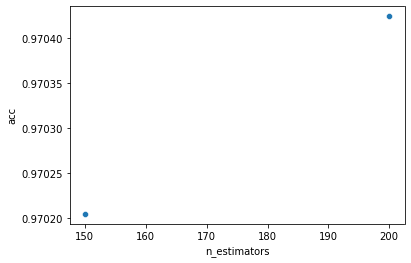

In [40]:
# plot params vs accuracy
sns.scatterplot(data=df_result_list, x="n_estimators", y="acc")

### Observation
saturate accuracy score n_estimator over 150

## search best max depth

In [45]:
# XGboost with grid search
param_grid = [
    {"max_depth": [4, 7, 10]}
]

In [46]:
# GridSearch
xgboost_gs_max_depth = GridSearchCV(XGBClassifier(n_estimators=100), param_grid, 
                          verbose=2, cv=3, return_train_score=True)
%time xgboost_gs_max_depth.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:23:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ........................................max_depth=4; total time= 4.4min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ........................................max_depth=4; total time= 4.6min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:32:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ........................................max_depth=4; total time= 4.5min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:36:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ........................................max_depth=7; total time= 8.3min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ........................................max_depth=7; total time= 8.7min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:53:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ........................................max_depth=7; total time= 9.5min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:03:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................................max_depth=10; total time=11.1min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:14:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................................max_depth=10; total time=10.2min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:24:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................................max_depth=10; total time=10.5min


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1h 26min 29s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [47]:
xgboost_gs_max_depth.cv_results_

{'mean_fit_time': array([269.86034163, 529.42745272, 635.46812296]),
 'std_fit_time': array([ 6.40968053, 30.82741912, 23.45897153]),
 'mean_score_time': array([0.3257672 , 0.54843728, 0.62600485]),
 'std_score_time': array([0.02532991, 0.0296116 , 0.02996389]),
 'param_max_depth': masked_array(data=[4, 7, 10],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 4}, {'max_depth': 7}, {'max_depth': 10}],
 'split0_test_score': array([0.96346994, 0.96668591, 0.96412963]),
 'split1_test_score': array([0.96553146, 0.96850004, 0.96652099]),
 'split2_test_score': array([0.96981941, 0.97122124, 0.96948957]),
 'mean_test_score': array([0.9662736 , 0.9688024 , 0.96671339]),
 'std_test_score': array([0.00264475, 0.00186385, 0.00219241]),
 'rank_test_score': array([3, 1, 2]),
 'split0_train_score': array([1., 1., 1.]),
 'split1_train_score': array([1., 1., 1.]),
 'split2_train_score': array([0.99995877, 1.        , 1.        ]),
 

In [52]:
# compare accuracy score between train and valid data(split 0)
params = xgboost_gs_max_depth.cv_results_['params']
mean_train_scores = xgboost_gs_max_depth.cv_results_['split0_train_score']
mean_test_scores = xgboost_gs_max_depth.cv_results_['split0_test_score']

mean_score_list = []
for param, mean_train_score, mean_test_score in zip(params, 
                                                    mean_train_scores, mean_test_scores):
    param["train_accuracy_score"] = mean_train_score
    param["valid_accuracy_score"] = mean_test_score
    mean_score_list.append(param)

In [53]:
mean_score_list

[{'max_depth': 4,
  'train_accuracy_score': 1.0,
  'valid_accuracy_score': 0.9634699431021687},
 {'max_depth': 7,
  'train_accuracy_score': 1.0,
  'valid_accuracy_score': 0.9666859074791787},
 {'max_depth': 10,
  'train_accuracy_score': 1.0,
  'valid_accuracy_score': 0.9641296281025811}]

In [54]:
df_mean_score_list = pd.DataFrame(mean_score_list)
df_mean_score_list

,max_depth,train_accuracy_score,valid_accuracy_score
0,4,1.0,0.963470
1,7,1.0,0.966686
2,10,1.0,0.964130


<AxesSubplot:xlabel='max_depth', ylabel='train_accuracy_score'>

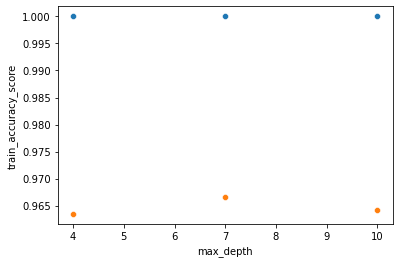

In [57]:
# plot params vs accuracy(train and valid)
sns.scatterplot(data=df_mean_score_list, x="max_depth", y="train_accuracy_score")
sns.scatterplot(data=df_mean_score_list, x="max_depth", y="valid_accuracy_score")

In [58]:
xgboost_gs_max_depth.best_params_

{'max_depth': 7,
 'train_accuracy_score': 1.0,
 'valid_accuracy_score': 0.9666859074791787}

### Observation

max depth = 7 is best

# Train XGBoost with best param

In [60]:
xgboost_best_param = XGBClassifier(n_estimators=100, max_depth=7)
xgboost_best_param.fit(X_train_scaled, y_train)

[18:48:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
# evaluate with train data
y_pred_train = xgboost_best_param.predict(X_train_scaled)
# accuracy score
accuracy_score_xgb_best = accuracy_score(y_pred_train, y_train)
print(accuracy_score_xgb_best)

1.0


# Evaluate XGBoost with test data

In [62]:
# evaluate with test data
y_pred_test = xgboost_best_param.predict(X_test_scaled)
# accuracy score
accuracy_score_xgb_best_test = accuracy_score(y_pred_test, y_test)
print(accuracy_score_xgb_best_test)

0.9722955145118733
